In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [54]:
temp_df = pd.read_csv('GlobalTemperatures.csv', parse_dates =[0])

In [55]:
temp_df.head()
temp_df.describe()
temp_df.count()
temp_df.isnull().sum()

## drop columns we dont need
temp_df = temp_df.drop(columns = ['LandAverageTemperatureUncertainty', 'LandMaxTemperature','LandMaxTemperatureUncertainty', 'LandMinTemperature','LandMinTemperatureUncertainty','LandAndOceanAverageTemperature','LandAndOceanAverageTemperatureUncertainty'])
temp_df.sample(10)

,dt,LandAverageTemperature
2291,1940-12-01,4.134
196,1766-05-01,11.228
995,1832-12-01,0.782
163,1763-08-01,14.126
690,1807-07-01,14.138
464,1788-09-01,11.699
3031,2002-08-01,14.560
2482,1956-11-01,5.738
1441,1870-02-01,2.134
129,1760-10-01,6.701


In [56]:
#find all rows where temp is null to analyse the data
temp_df[temp_df['LandAverageTemperature'].isnull()]

temp_df['month'] = temp_df['dt'].dt.month
#tempr_df.groupby("month").mean()
temp_df['LandAverageTemperature'] = temp_df['LandAverageTemperature'].fillna(temp_df.groupby('month')['LandAverageTemperature'].transform('mean'))


In [57]:
temp_df.isnull().sum()

dt                        0
LandAverageTemperature    0
month                     0
dtype: int64

In [58]:
#first set index 
temp_df= temp_df.set_index('dt')

#drop these rows as they are old data
temp_df = temp_df.dropna()
temp_df.isnull().sum()

LandAverageTemperature    0
month                     0
dtype: int64

,LandAverageTemperature
dt,
1750-01-01,3.034
1750-02-01,3.083
1750-03-01,5.626
1750-04-01,8.490
1750-05-01,11.573
...,...
2015-08-01,14.755
2015-09-01,12.999
2015-10-01,10.801


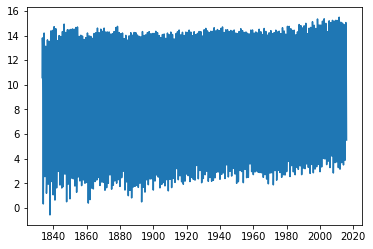

In [59]:
#drop month column

temp_df = temp_df.drop(columns=['month'])

temp_df.head(20)
plt.plot(temp_df[1000:])
temp_df

            LandAverageTemperature
dt                                
1750-01-01                     NaN
1750-02-01                     NaN
1750-03-01                     NaN
1750-04-01                     NaN
1750-05-01                     NaN
...                            ...
2015-08-01                9.683750
2015-09-01                9.676083
2015-10-01                9.715333
2015-11-01                9.775333
2015-12-01                9.831000

[3192 rows x 1 columns]             LandAverageTemperature
dt                                
1750-01-01                     NaN
1750-02-01                     NaN
1750-03-01                     NaN
1750-04-01                     NaN
1750-05-01                     NaN
...                            ...
2015-08-01                4.227265
2015-09-01                4.220602
2015-10-01                4.229417
2015-11-01                4.187856
2015-12-01                4.120330

[3192 rows x 1 columns]


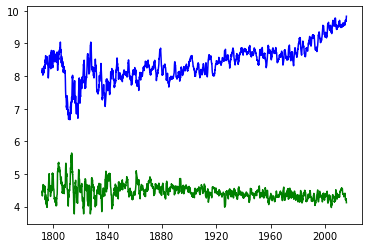

In [60]:
## check stationarity first using rolling values

rollmean = temp_df.rolling(window = 12).mean()
rollstd = temp_df.rolling(window = 12).std()
print(rollmean, rollstd)

plt_mean = plt.plot(rollmean[500:], color = 'blue', label = 'Rolling Mean')
plt_std = plt.plot(rollstd[500:], color = 'green', label = 'Rolling Deviation')
plt.show()

In [9]:
#temp_df.isnull().sum()
#temp_df = temp_df.dropna()
temp_df.index.isnull().sum()

0

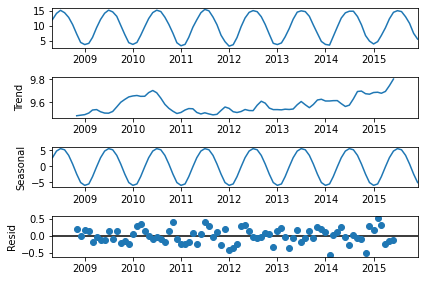

In [10]:
#check stationarity using seasonal decompose
from statsmodels.tsa.seasonal import seasonal_decompose
temp_df = temp_df.asfreq('MS')
## doing a subset to see better results
decomposition = seasonal_decompose(temp_df[3100:])
fig = decomposition.plot()
plt.show()

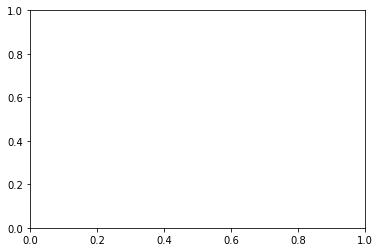

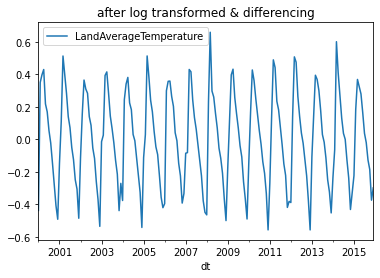

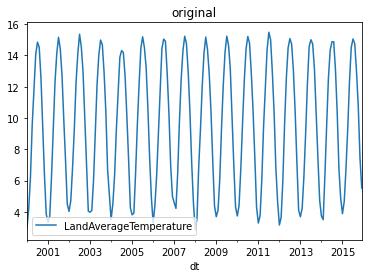

In [11]:
#seasonlity exists - need to remove it
#power transform(log) to remove trend and differencing by 1 to remove seasonality
log_temp = pd.DataFrame(temp_df.LandAverageTemperature.apply(lambda x : np.log(x)))
log_difftemp = log_temp - log_temp.shift()
ax1 = plt.subplot()
log_difftemp[3000:].plot(title='after log transformed & differencing');
ax2 = plt.subplot()
temp_df[3000:].plot(title='original'); 

In [12]:
#check adf test for the transformed data
from statsmodels.tsa.stattools import adfuller
adftest0 = adfuller(temp_df.dropna().LandAverageTemperature)
print("p-value :", adftest0[1])

p-value : 0.004466785440338404


In [13]:
#check adf test for the transformed data
from statsmodels.tsa.stattools import adfuller
adftest1 = adfuller(log_difftemp.dropna().LandAverageTemperature)
print("p-value :", adftest1[1])

p-value : 2.2330452600486397e-20


c:\users\my pc\appdata\local\programs\python\python39\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


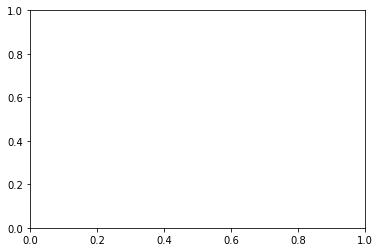

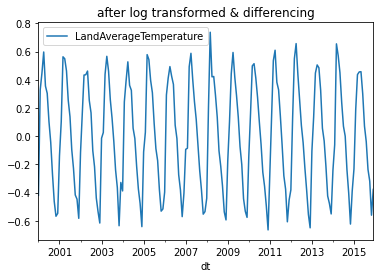

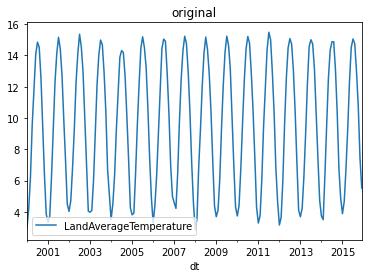

In [14]:
#seasonality removal part 2 - using square root(power transform) to remove trend and differencing by 1 to remove seasonality
sq_temp = pd.DataFrame(temp_df.LandAverageTemperature.apply(lambda x : x**0.5))
sq_difftemp = sq_temp - sq_temp.shift()
ax1 = plt.subplot()
sq_difftemp[3000:].plot(title='after log transformed & differencing');
ax2 = plt.subplot()
temp_df[3000:].plot(title='original'); 

In [15]:
#check adf test for the transformed data
from statsmodels.tsa.stattools import adfuller
adftest2 = adfuller(sq_difftemp.dropna().LandAverageTemperature)
print (adftest2)
#print("p-value :", adftest2[1])

c:\users\my pc\appdata\local\programs\python\python39\lib\site-packages\pandas\core\series.py:857: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(self._values, dtype)


(-24.412364875638886, 0.0, 22, 3168, {'1%': -3.4324158480194886, '5%': -2.862452765302856, '10%': -2.5672558859467465}, -702.2185895134808)


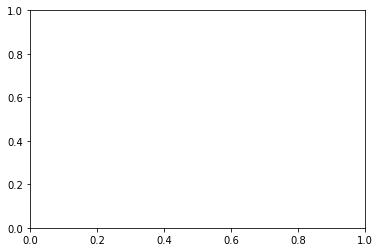

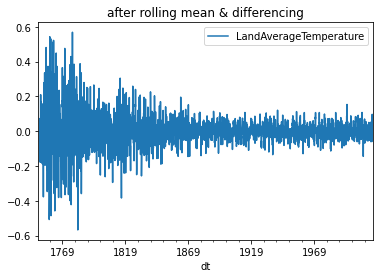

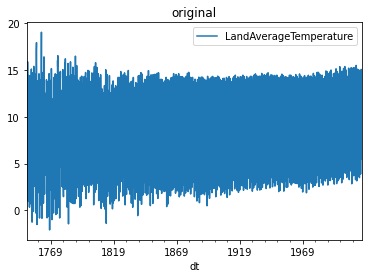

In [16]:
#seasonality removal 3 - Differencing over rolling mean to remove trend and differencing by 1 to remove seasonality

rolling_mean = temp_df.rolling(window = 12).mean()
rolling_mean_diff = rolling_mean - rolling_mean.shift()
ax1 = plt.subplot()
rolling_mean_diff.plot(title='after rolling mean & differencing');
ax2 = plt.subplot()
temp_df.plot(title='original'); 

In [17]:
#check adf test for the transformed data
from statsmodels.tsa.stattools import adfuller
adftest3 = adfuller(rolling_mean_diff.dropna().LandAverageTemperature)
print (adftest3)
#print("p-value :", adftest2[1])

(-15.868057929921227, 9.049128867831435e-29, 24, 3155, {'1%': -3.4324243671707535, '5%': -2.862456528056838, '10%': -2.5672578891704614}, -7762.907356815362)


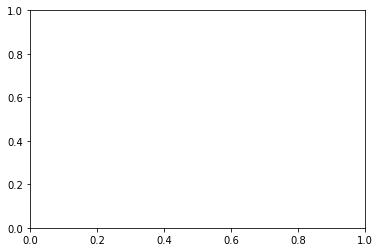

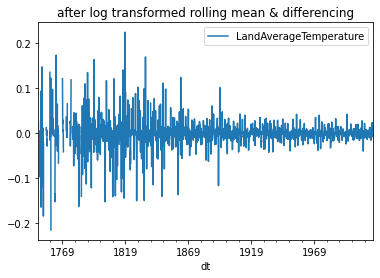

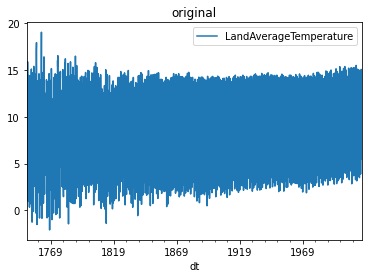

In [27]:
#seasomlaity check 4 - logged transform and rolling mean to remove trend and differencing by 1 to remove seasonality
logged_transform = pd.DataFrame(temp_df.LandAverageTemperature.apply(lambda x : np.log(x)))
rolling_mean = logged_transform.rolling(window = 12).mean()
diff = rolling_mean - rolling_mean.shift(1)
ax1 = plt.subplot()
diff.plot(title='after log transformed rolling mean & differencing');
ax2 = plt.subplot()
temp_df.plot(title='original'); 

In [28]:
#check adf test for the transformed data
from statsmodels.tsa.stattools import adfuller
adftest4 = adfuller(diff.dropna().LandAverageTemperature)
print (adftest4)

(-14.242780011834848, 1.527509795578993e-26, 23, 2940, {'1%': -3.4325761968413655, '5%': -2.862523586655913, '10%': -2.5672935902864547}, -14365.669399219812)


c:\users\my pc\appdata\local\programs\python\python39\lib\site-packages\pandas\core\window\rolling.py:321: ComplexWarning: Casting complex values to real discards the imaginary part
  values = ensure_float64(values)


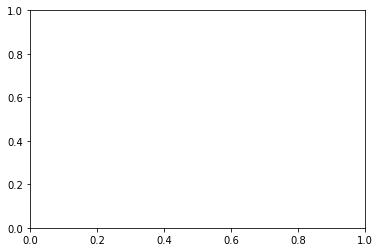

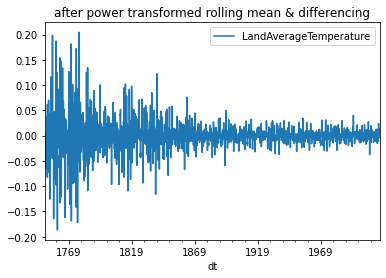

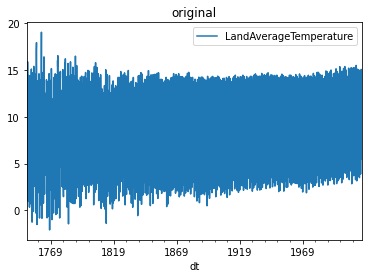

In [18]:
#seasomlaity check 5 - differencing of sqrt transform and rolling mean to remove trend and differencing by 1 to remove seasonality
powered_transform = pd.DataFrame(temp_df.LandAverageTemperature.apply(lambda x :  x ** 0.5))
rolling_mean = powered_transform.rolling(window = 12).mean()
diff1 = rolling_mean - rolling_mean.shift(1)
ax1 = plt.subplot()
diff1.plot(title='after power transformed rolling mean & differencing');
ax2 = plt.subplot()
temp_df.plot(title='original');

In [19]:
#check adf test for the transformed data
from statsmodels.tsa.stattools import adfuller
adftest4 = adfuller(diff1.dropna().LandAverageTemperature)
print (adftest4)

(-18.83896486205909, 0.0, 23, 3156, {'1%': -3.4324237093576846, '5%': -2.862456237513167, '10%': -2.5672577344900813}, -15952.524425323052)


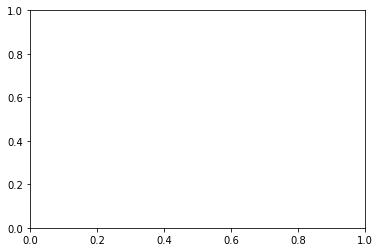

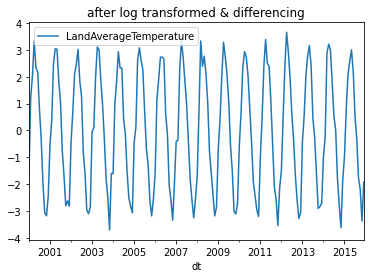

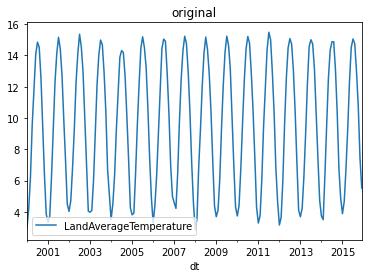

In [20]:
#seasonlity exists - need to remove it
#differencing by 1 to remove seasonality
#log_temp = pd.DataFrame(temp_df.LandAverageTemperature.apply(lambda x : np.log(x)))
log_difftemp1 = temp_df - temp_df.shift()
ax1 = plt.subplot()
log_difftemp1[3000:].plot(title='after log transformed & differencing');
ax2 = plt.subplot()
temp_df[3000:].plot(title='original');

In [21]:
#check adf test for the transformed data
from statsmodels.tsa.stattools import adfuller
adftest5 = adfuller(log_difftemp1.dropna().LandAverageTemperature)
print (adftest5)

(-14.343743402181097, 1.0494416426294112e-26, 29, 3161, {'1%': -3.432420426540509, '5%': -2.8624547875535526, '10%': -2.56725696255705}, 7376.75459911739)


c:\users\my pc\appdata\local\programs\python\python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


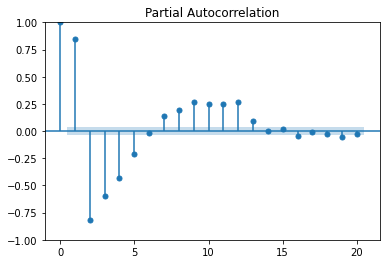

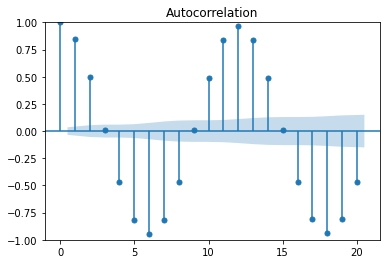

In [22]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
pacf = plot_pacf(temp_df['LandAverageTemperature'], lags = 20)
acf = plot_acf(temp_df['LandAverageTemperature'], lags = 20)

<class 'pandas.core.series.Series'>


c:\users\my pc\appdata\local\programs\python\python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


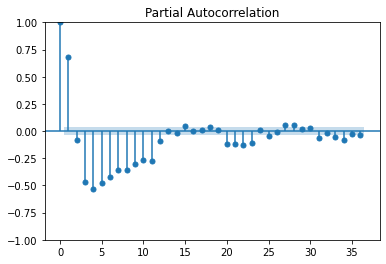

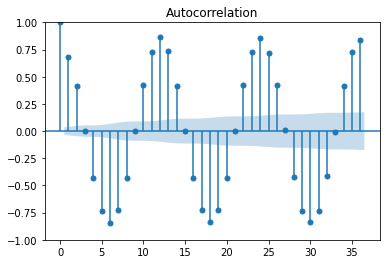

In [47]:
#difference the timeseries and plot the PACF and ACF graph to get differening value

df_diff = temp_df.LandAverageTemperature.diff().dropna()
#df_diff = temp_df.LandAverageTemperature.diff().diff().dropna() - second order differencing
print(type(df_diff))
pacf = plot_pacf(df_diff)
acf = plot_acf(df_diff)

In [23]:
temp_df.count()
train_X = temp_df[:3000]
test_Y = temp_df[3000:]
print(type(train_X))

<class 'pandas.core.frame.DataFrame'>


In [24]:
## running the auto_arima, however best AIC or BIC model does not mean best TS model
from pmdarima import auto_arima
import warnings
warnings.filterwarnings ='ignore'
stepwise_data = auto_arima(train_X, start_P = 0, seasonal = True, d = 1, trace = True, supress_warnings = True, stepwise = True )

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=8290.703, Time=3.56 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=13814.614, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=12016.347, Time=0.24 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=12652.211, Time=0.37 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=13812.614, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=3.27 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=12006.210, Time=1.09 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=7799.063, Time=5.23 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=9067.602, Time=5.03 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=7793.439, Time=7.27 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=8235.642, Time=3.57 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=8211.111, Time=6.31 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=7724.965, Time=7.09 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=7586.688, Time=5.87 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept

In [25]:
## add looping to auto_arima to get the minimum error

import itertools
p = range(0,8)
d = range(0,2)
q = range(0,8)

list_auto = list(itertools.product(p,d,q))

In [26]:
temp_df.iloc[1]

LandAverageTemperature    3.083
Name: 1750-02-01 00:00:00, dtype: float64

In [27]:
len(list_auto)

128

In [34]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
rmse =[]
order = []

for pdq in list_auto:
    try:
        model = ARIMA(train_X, order =pdq).fit()
        pred = model.predict(start = len(train_X), end = len(temp_df)-1)
        err = np.sqrt(mean_squared_error(test_Y, pred))
        order.append(pdq)
        rmse.append(err)
        
    except:
        continue

c:\users\my pc\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\users\my pc\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\users\my pc\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\users\my pc\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  

c:\users\my pc\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\users\my pc\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\users\my pc\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\my pc\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings

c:\users\my pc\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\my pc\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\my pc\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\my pc\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimizat

c:\users\my pc\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\my pc\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\users\my pc\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\my pc\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertib

In [35]:
print(order, rmse)
result = pd.DataFrame(index = order, data =rmse, columns = ['RMSE'])
result.to_csv('G:/2021 study/ML/Climate Change/PMDARIMA.csv')

#got (2, 1, 3)	0.415855641 from this 

[(0, 0, 0), (0, 0, 1), (0, 0, 2), (0, 0, 3), (0, 0, 4), (0, 0, 5), (0, 0, 6), (0, 0, 7), (0, 1, 0), (0, 1, 1), (0, 1, 2), (0, 1, 3), (0, 1, 4), (0, 1, 5), (0, 1, 6), (0, 1, 7), (1, 0, 0), (1, 0, 1), (1, 0, 2), (1, 0, 3), (1, 0, 4), (1, 0, 5), (1, 0, 6), (1, 0, 7), (1, 1, 0), (1, 1, 1), (1, 1, 2), (1, 1, 3), (1, 1, 4), (1, 1, 5), (1, 1, 6), (1, 1, 7), (2, 0, 0), (2, 0, 1), (2, 0, 2), (2, 0, 3), (2, 0, 4), (2, 0, 5), (2, 0, 6), (2, 0, 7), (2, 1, 0), (2, 1, 1), (2, 1, 2), (2, 1, 3), (2, 1, 4), (2, 1, 5), (2, 1, 6), (2, 1, 7), (3, 0, 0), (3, 0, 1), (3, 0, 2), (3, 0, 3), (3, 0, 4), (3, 0, 5), (3, 0, 6), (3, 0, 7), (3, 1, 0), (3, 1, 1), (3, 1, 2), (3, 1, 3), (3, 1, 4), (3, 1, 5), (3, 1, 6), (3, 1, 7), (4, 0, 0), (4, 0, 1), (4, 0, 2), (4, 0, 3), (4, 0, 4), (4, 0, 5), (4, 0, 6), (4, 0, 7), (4, 1, 0), (4, 1, 1), (4, 1, 2), (4, 1, 3), (4, 1, 4), (4, 1, 5), (4, 1, 6), (4, 1, 7), (5, 0, 0), (5, 0, 1), (5, 0, 2), (5, 0, 3), (5, 0, 4), (5, 0, 5), (5, 0, 6), (5, 0, 7), (5, 1, 0), (5, 1, 1), (5, 1, 2)

In [36]:
from statsmodels.tsa.arima.model import ARIMA
model1 = ARIMA(train_X, order = (2, 1, 3)).fit()

c:\users\my pc\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\users\my pc\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [37]:
from sklearn.metrics import mean_squared_error
pred = model1.predict(start = len(train_X), end = len(temp_df)-1)
err = np.sqrt(mean_squared_error(test_Y, pred))
print(err);

0.4158556413182109


In [38]:
pred.head()

2000-01-01     3.554379
2000-02-01     4.123282
2000-03-01     6.085403
2000-04-01     8.914906
2000-05-01    11.853626
Freq: MS, Name: predicted_mean, dtype: float64

<AxesSubplot:xlabel='dt'>

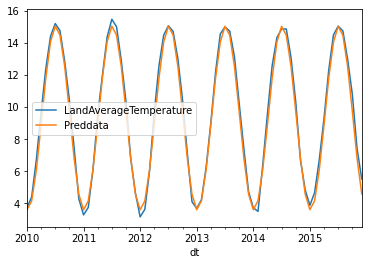

In [41]:
test_Y[120:].plot(legend = True, label = 'Testdata')
pred[120:].plot(legend = True, label = 'Preddata')

In [40]:
test_Y.count()

LandAverageTemperature    192
dtype: int64

In [48]:
##train, test and validation is complete, we have all the values and build model on full dataset, 
##now to predict unseen future
final_model = ARIMA(temp_df, order = (2, 1, 3)).fit()

c:\users\my pc\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\users\my pc\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [51]:
final_pred = final_model.predict(start = len(temp_df), end = len(temp_df)+30)

<AxesSubplot:>

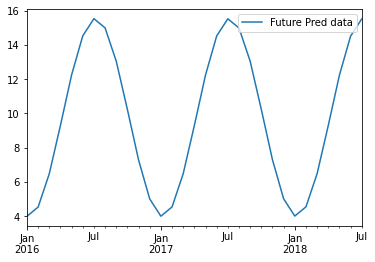

In [52]:
final_pred.plot(legend = True, label = "Future Pred data")

In [62]:
## now run SARIMAX or seasonal ARIMA

from statsmodels.tsa.statespace.sarimax import SARIMAX

In [63]:
#we are choosing 12 as seasonal order as we have noticed the seasonality is every 12 months.
## we are not giving any column as exog(external factor), but if present, we need to add 4th parameter, exog = df[column]
## exog value or external value is what "X" factor in SARIMAX is
#disp = FALSE wont show error
sarimax_model = SARIMAX(temp_df, order =(2, 1, 3), seasonal_order = (2, 1, 3, 12)).fit(disp = False)

c:\users\my pc\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\my pc\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\my pc\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [64]:
sarimax_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:             LandAverageTemperature   No. Observations:                 3192
Model:             SARIMAX(2, 1, 3)x(2, 1, 3, 12)   Log Likelihood               -3602.052
Date:                            Sun, 19 Dec 2021   AIC                           7226.104
Time:                                    07:37:30   BIC                           7292.812
Sample:                                01-01-1750   HQIC                          7250.028
                                     - 12-01-2015                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1316      0.072     15.809      0.000       0.991       1.272
ar.L2         -0.4869      0.037    -13.260      0.000      -0.559      -0.415
ma.L1         -1.8257      0.073    -25.126      0.000      -1.968      -1.683
ma.L2          1.1445      0.085     13.430      0.000       0.977       1.311
ma.L3         -0.3014      0.033     -9.137      0.000      -0.366      -0.237
ar.S.L12      -0.8680      0.113     -7.659      0.000      -1.090      -0.646
ar.S.L24       0.0311      0.114      0.272      0.786      -0.193       0.255
ma.S.L12      -0.0298      0.114     -0.261      0.794      -0.254       0.194
ma.S.L24      -0.8496      0.037    -22.967      0.000      -0.922      -0.777
ma.S.L36      -0.0631      0.110     -0.572      0.568      -0.279       0.153
sigma2         0.5540      0.007     78.273      0.000       0.540       0.568
===================================================================================
Ljung-Box (L1) (Q):                   0.16   Jarque-Bera (JB):              7111.94
Prob(Q):                              0.69   Prob(JB):                         0.00
Heteroskedasticity (H):               0.06   Skew:                             0.55
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [65]:
pred_sari = sarimax_model.predict(start = len(temp_df), end = len(temp_df)+30)

<AxesSubplot:>

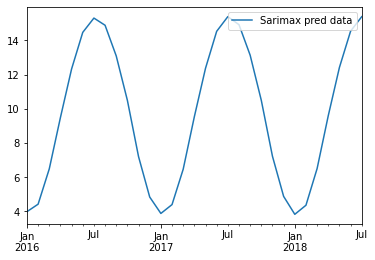

In [66]:
pred_sari.plot(legend = True, label = "Sarimax pred data")

In [67]:
pred_sari.head()

2016-01-01     3.980637
2016-02-01     4.419117
2016-03-01     6.483025
2016-04-01     9.487901
2016-05-01    12.328660
Freq: MS, Name: predicted_mean, dtype: float64